Question 03

Point selected: (668, 483)
Point selected: (830, 466)
Point selected: (829, 544)
Point selected: (644, 569)


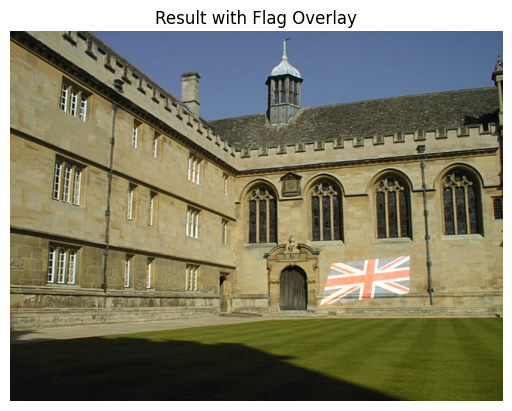

True

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load images
building_image = cv.imread('Images/005.jpg')  # Replace with your architectural image
flag_image = cv.imread('Images/flag.png')  # Replace with your flag image

# Resize the flag image (optional, adjust as needed)
flag_image = cv.resize(flag_image, (200, 100))

# Store the points selected by the user
selected_points = []

# Mouse callback function to select points on the image
def select_point(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN and len(selected_points) < 4:
        selected_points.append((x, y))
        print(f"Point selected: {x, y}")

# Display the building image and allow user to select points
cv.imshow('Select 4 points on the building image', building_image)
cv.setMouseCallback('Select 4 points on the building image', select_point)

# Wait until 4 points are selected
while len(selected_points) < 4:
    cv.waitKey(1)

cv.destroyAllWindows()

# Coordinates of the four corners of the flag (source points in the flag image)
flag_pts = np.float32([
    [0, 0], 
    [flag_image.shape[1], 0], 
    [flag_image.shape[1], flag_image.shape[0]], 
    [0, flag_image.shape[0]]
])

# Coordinates of the points clicked on the building image (destination points)
building_pts = np.float32(selected_points)

# Compute homography matrix
H, status = cv.findHomography(flag_pts, building_pts)

# Warp the flag image to align with the selected building points
warped_flag = cv.warpPerspective(flag_image, H, (building_image.shape[1], building_image.shape[0]))

# Create a mask from the warped flag to blend it with the building image
mask = np.zeros_like(building_image, dtype=np.uint8)
cv.fillConvexPoly(mask, np.int32(building_pts), (255, 255, 255))

# Option 2: Combine the images using a weighted average
alpha = 0.5  # Blending factor
blended_result = cv.addWeighted(warped_flag, alpha,building_image , 1 , 0)

# Inverse the mask to remove the area where the flag will be placed
building_image_masked = cv.bitwise_and(building_image, cv.bitwise_not(mask))


# Blend the warped flag onto the building image
result = cv.add(building_image_masked, warped_flag)

# Display the result
plt.imshow(cv.cvtColor(blended_result, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Result with Flag Overlay')
plt.show()

# Save the result if needed
cv.imwrite('result_with_flag.jpg', result)
